In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Obesity.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Obesity
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity


# 1. EDA - Exploratory Data Analysis

In [3]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
df.shape

(2111, 17)

In [5]:
df['NObeyesdad'].value_counts(normalize=True) #NObeyesdad es la variable target o Y.Aca hay un desbalanceo porque existing customer representa el 84% de la data, hay que hacer un balanceo.

NObeyesdad
Normal_Weight    0.571767
Obesity          0.428233
Name: proportion, dtype: float64

### 1.1 - Escala de Variables

In [6]:
# Obtenemos variables numericas con escala continua
continuas = [col for col in df.columns if ((df[col].dtype in ['int64', 'float']) and (len(df[col].unique())>30))]
continuas

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [7]:
# Obtenemos variables numericas con escala discreta
discretas = [col for col in df.columns if ((df[col].dtype in ['int64', 'float']) and (len(df[col].unique())<=30))]
discretas

[]

In [8]:
# Obtenemos variables numericas con escala categorica
categoricas = [col for col in df.columns if (df[col].dtype == 'object')]
categoricas

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

### 1.2 Analisis de Variables Categoricas y Discretas vrs Target

Analizamos las variables categoricas y discretas para verificar el impacto que genera cada valor dentro de la variable sobre el target.

--------------Gender


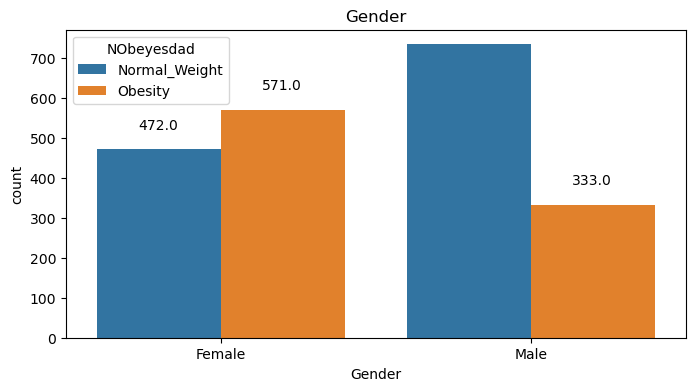

--------------CALC


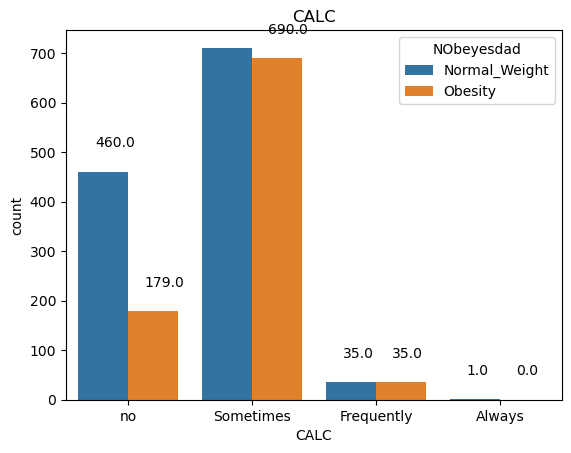

--------------FAVC


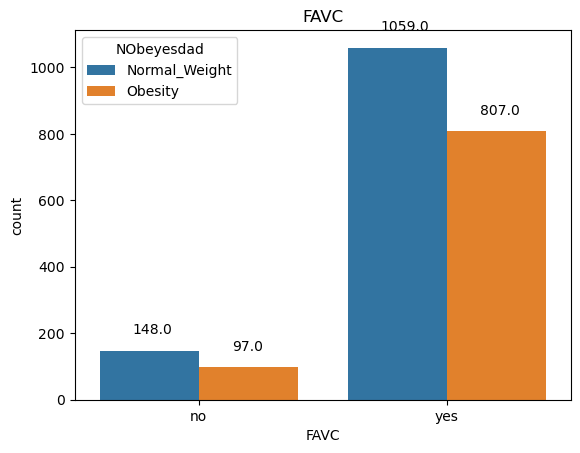

--------------SCC


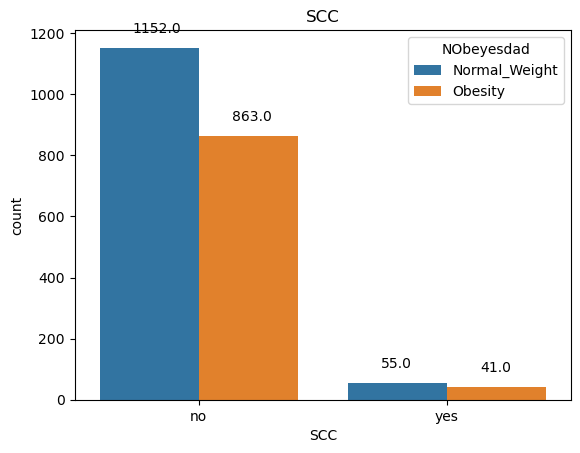

--------------SMOKE


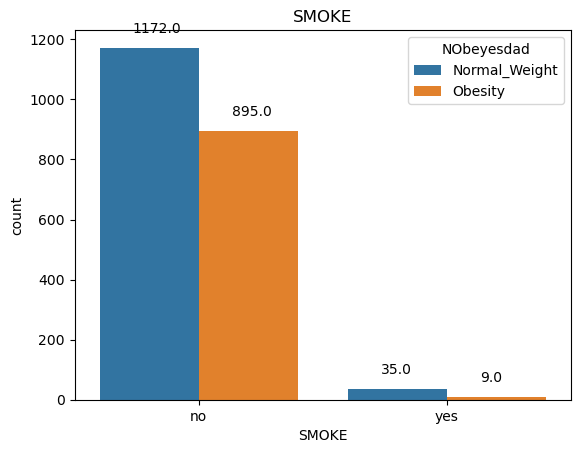

--------------family_history_with_overweight


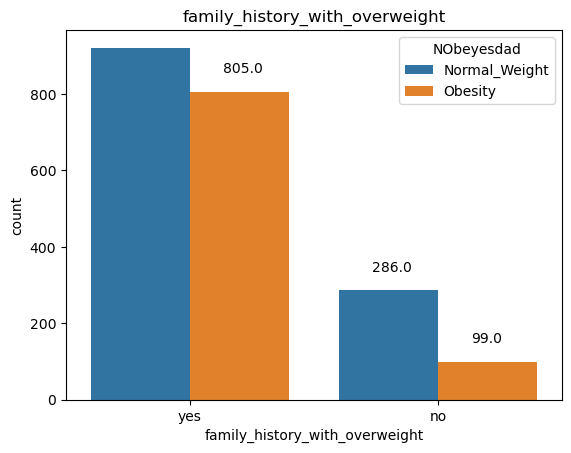

--------------CAEC


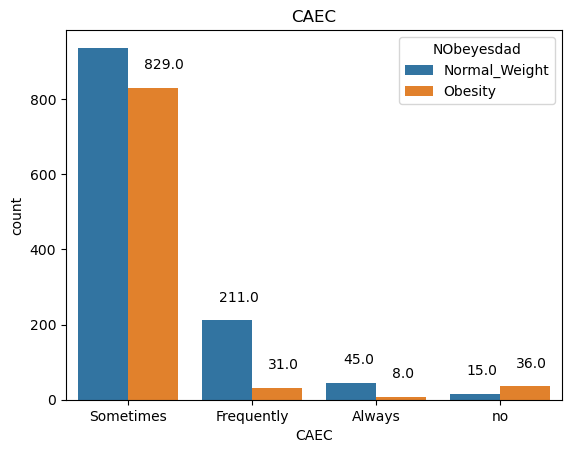

--------------MTRANS


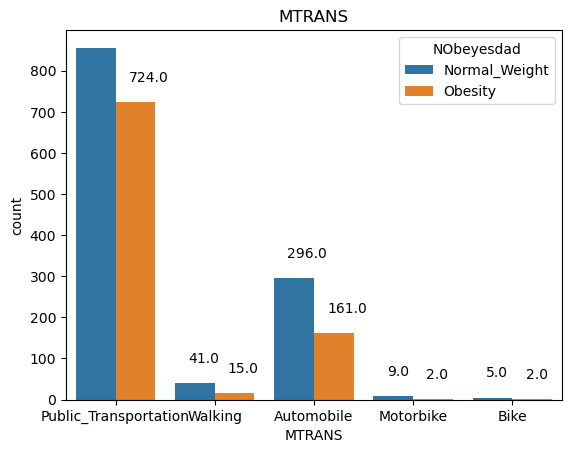

--------------NObeyesdad


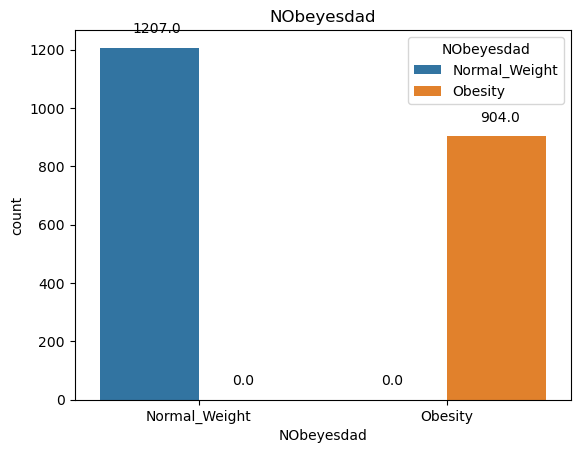

In [9]:
plt.figure(figsize=(8, 4))

for colName in categoricas + discretas:
    plot = sns.countplot(x=df[colName], hue=df['NObeyesdad'])
    plt.title(colName)
    print("--------------" + colName)
    for p in plot.patches:
        plot.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height()+ 50))
    plt.show()

### 1.3 - Analisis de Variables Continuas vrs Target

Analizamos las variables continuas para verificar el impacto que genera cada valor dentro de la variable sobre el target.

--------------Age


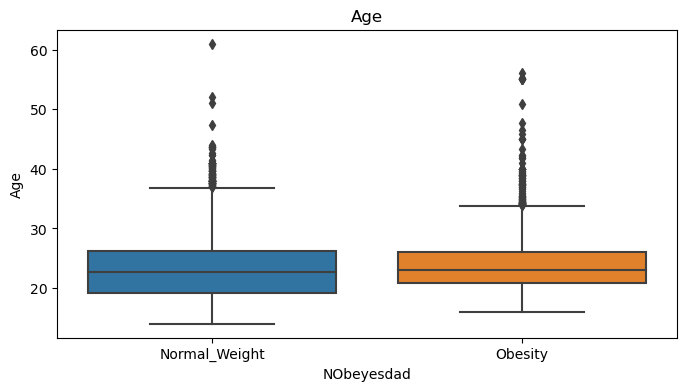

--------------Height


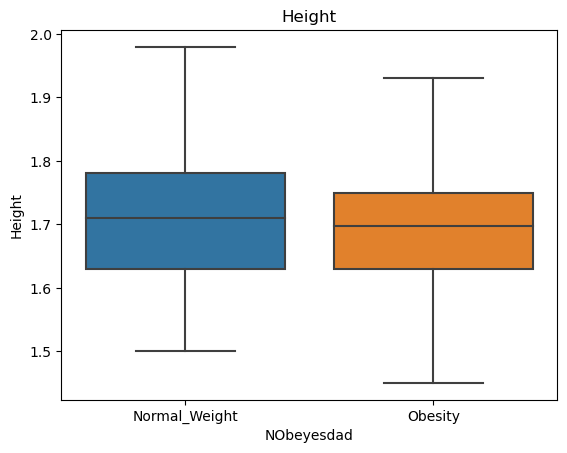

--------------Weight


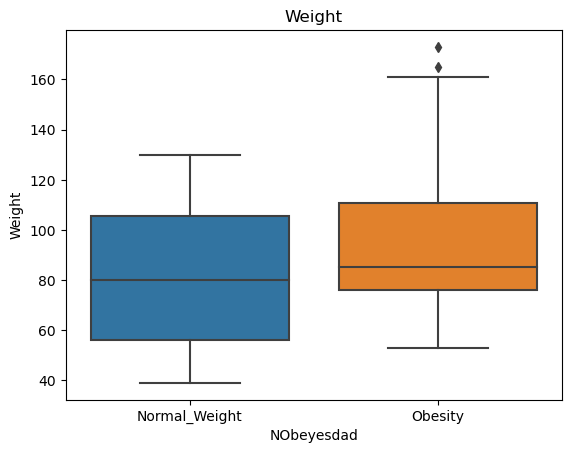

--------------FCVC


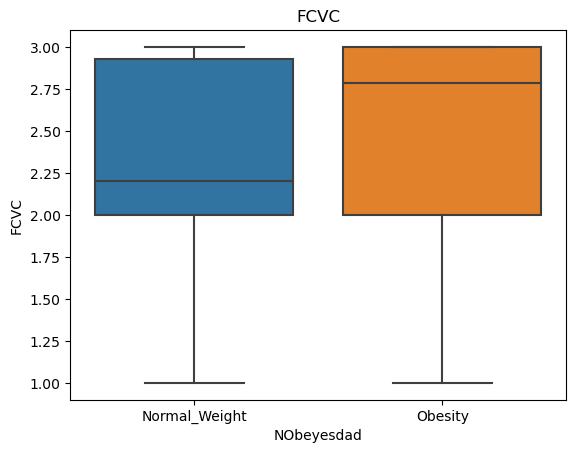

--------------NCP


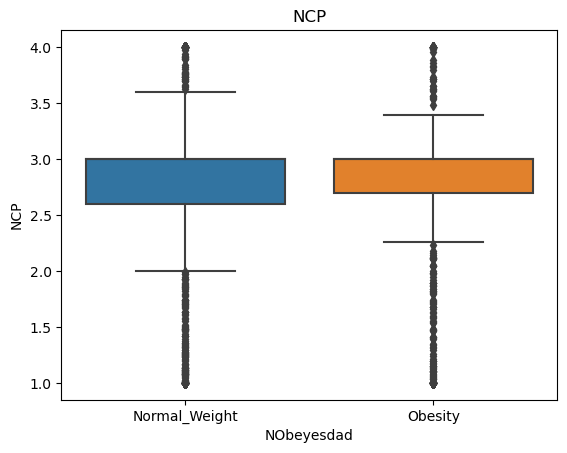

--------------CH2O


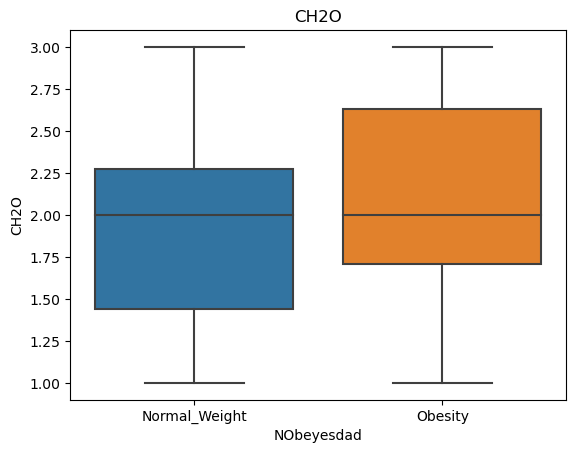

--------------FAF


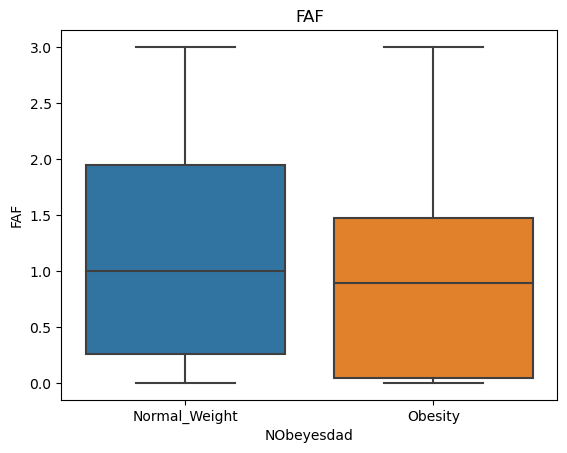

--------------TUE


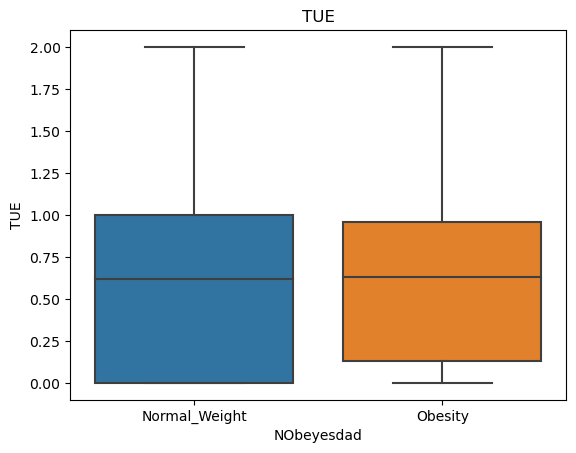

In [10]:
plt.figure(figsize=(8, 4))

for colName in continuas:
    plot = sns.boxplot(y=df[colName], x=df['NObeyesdad'])
    plt.title(colName)
    print("--------------" + colName)
    plt.show()

## 2.- Ingenieria de Caracteristicas

### 2.1 - Imputacion de Variables (o tratar la data faltante)

In [11]:
df.isnull().mean()

Age                               0.0
Gender                            0.0
Height                            0.0
Weight                            0.0
CALC                              0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
SCC                               0.0
SMOKE                             0.0
CH2O                              0.0
family_history_with_overweight    0.0
FAF                               0.0
TUE                               0.0
CAEC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

El dataset no presenta datos faltantes en ninguna de sus variables por lo que no sera necesario aplicar imputaciones.

### 2.2 - Codificacion de Variables Categoricas

Para todas las variables, excepto **Gender** y **NObeyesdad** aplicamos una codificacion por frecuencia. 

In [12]:
for colName in categoricas:
    if(colName not in ['Gender', 'NObeyesdad']):
        encoder_dict = df[colName].value_counts().to_dict()
        df[colName] = df[colName].map(encoder_dict)

### 2.2.1 - Codificacion de Variable Gender

In [13]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True).astype(int)

In [14]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,639,245,2.0,3.0,2015,2067,2.000000,1726,0.000000,1.000000,1765,1580,Normal_Weight
1,21.000000,0,1.520000,56.000000,1401,245,3.0,3.0,96,44,3.000000,1726,3.000000,0.000000,1765,1580,Normal_Weight
2,23.000000,1,1.800000,77.000000,70,245,2.0,3.0,2015,2067,2.000000,1726,2.000000,1.000000,1765,1580,Normal_Weight
3,27.000000,1,1.800000,87.000000,70,245,3.0,3.0,2015,2067,2.000000,385,2.000000,0.000000,1765,56,Obesity
4,22.000000,1,1.780000,89.800000,1401,245,2.0,1.0,2015,2067,2.000000,385,0.000000,0.000000,1765,1580,Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1401,1866,3.0,3.0,2015,2067,1.728139,1726,1.676269,0.906247,1765,1580,Obesity
2107,21.982942,0,1.748584,133.742943,1401,1866,3.0,3.0,2015,2067,2.005130,1726,1.341390,0.599270,1765,1580,Obesity
2108,22.524036,0,1.752206,133.689352,1401,1866,3.0,3.0,2015,2067,2.054193,1726,1.414209,0.646288,1765,1580,Obesity
2109,24.361936,0,1.739450,133.346641,1401,1866,3.0,3.0,2015,2067,2.852339,1726,1.139107,0.586035,1765,1580,Obesity


### 2.2.2 - Codificacion de variable Target (NObeyesdad)

Para el target se recomiendo usar Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])

### 3.3 - Tratamiento de Outliers

In [16]:
import scipy.stats as stats

#### 3.3.1 - Visualizacion de Densidad y Boxplot para detectar outliers

--------------Age


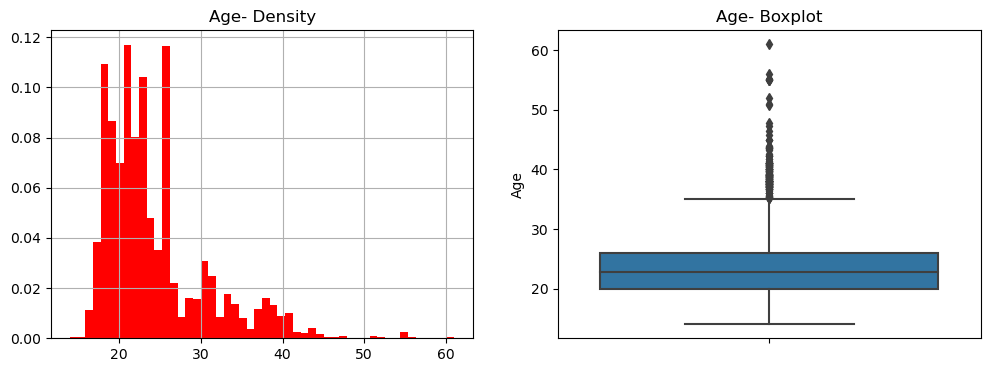

--------------Height


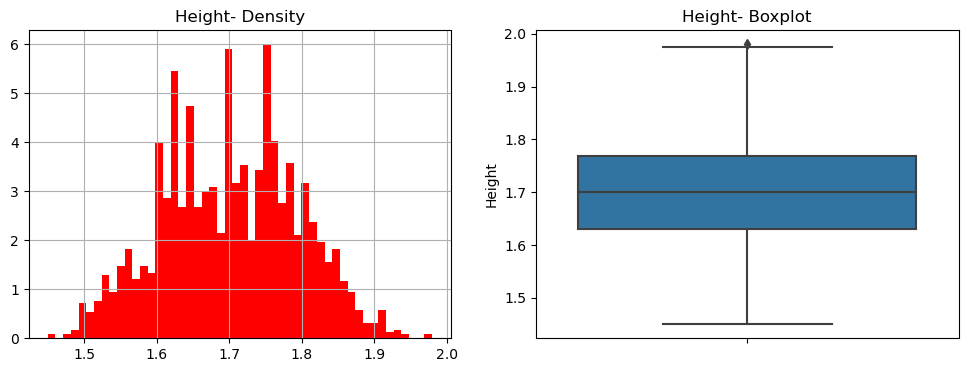

--------------Weight


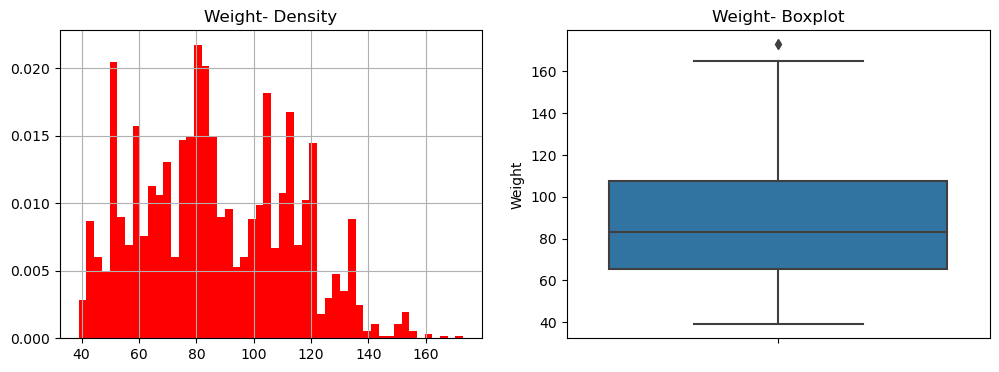

--------------FCVC


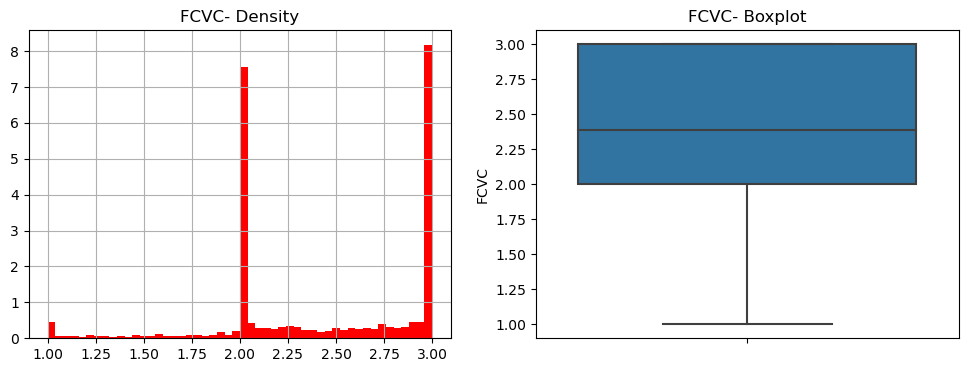

--------------NCP


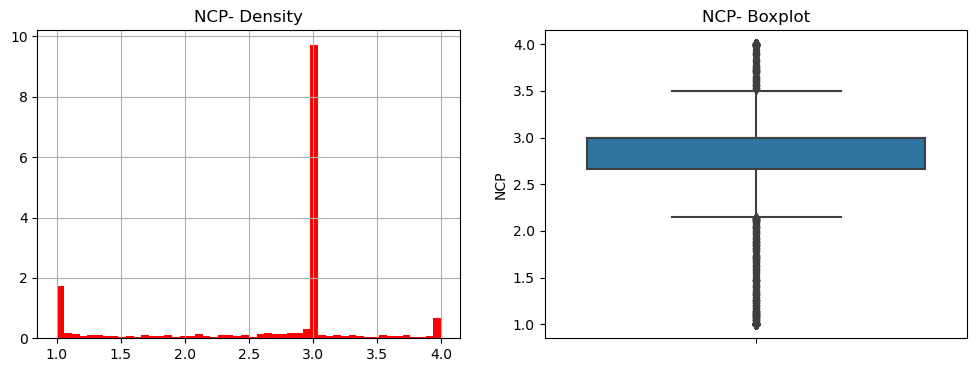

--------------CH2O


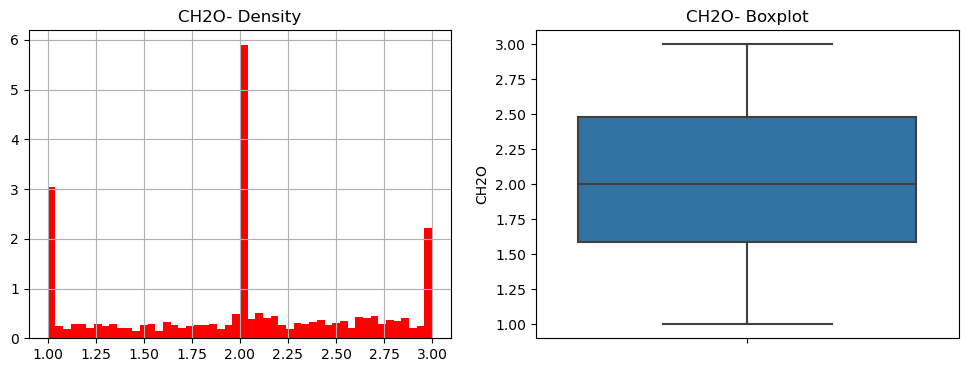

--------------FAF


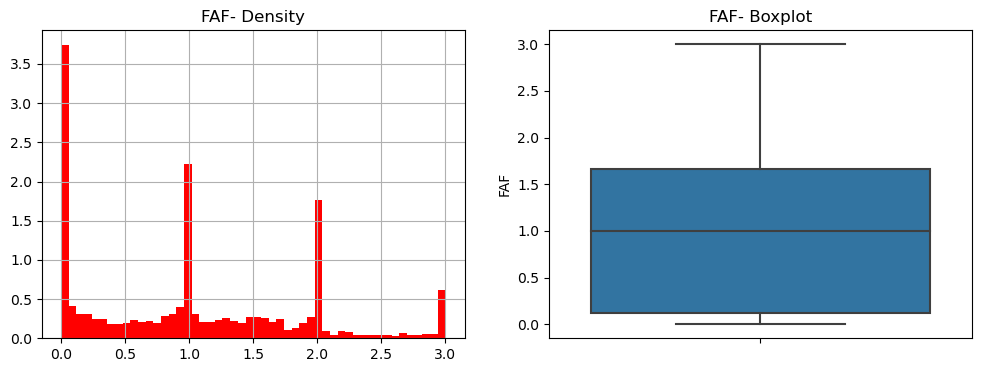

--------------TUE


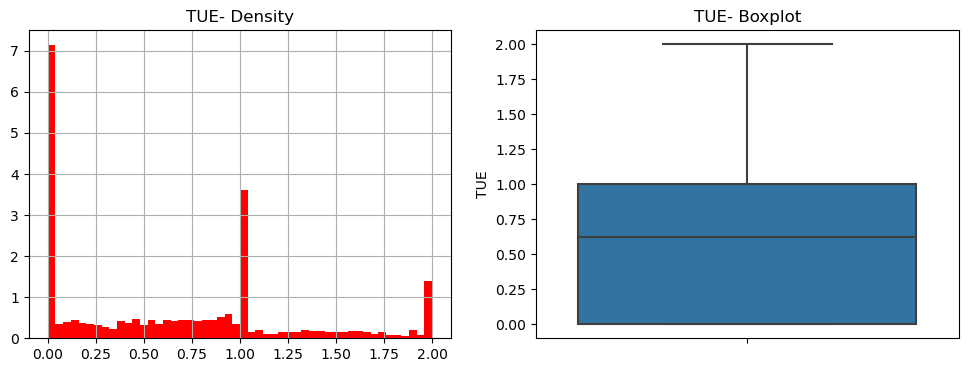

In [17]:
for colName in continuas:

    plt.figure(figsize=(12, 4))
    print("--------------" + colName)

    plt.subplot(121)
    df[colName].hist(bins=50, density=True, color='red')
    plt.title(colName + "- Density")

    plt.subplot(122)
    sns.boxplot(y=df[colName])
    plt.title(colName + "- Boxplot")

    plt.show()

In [18]:
# Procedimiento para tratamiento de outliers con 1.5*IQR

for colName in continuas:

    IQR = df[colName].quantile(0.75) - df[colName].quantile(0.25)
    LI = df[colName].quantile(0.25) - 1.5*IQR
    LS = df[colName].quantile(0.75) + 1.5*IQR

    df[colName] = np.where(df[colName] > LS, LS,
                                    np.where(df[colName] < LI, LI, df[colName]))

### 3.4 - Transformacion de Variables Continuas

--------------Age


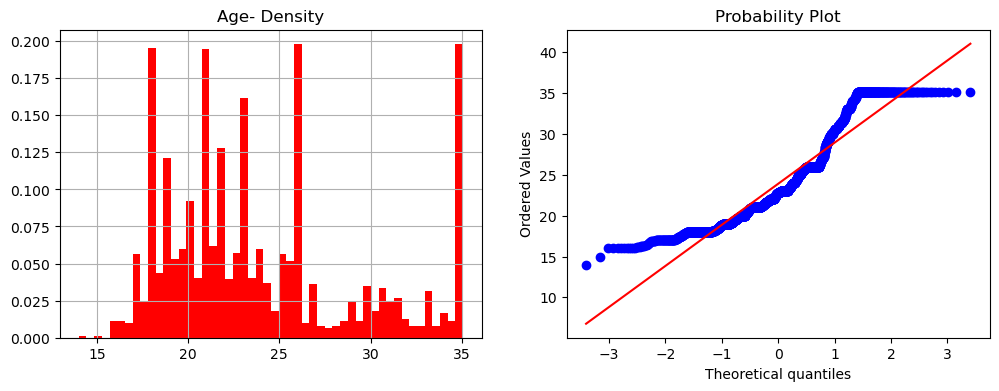

--------------Height


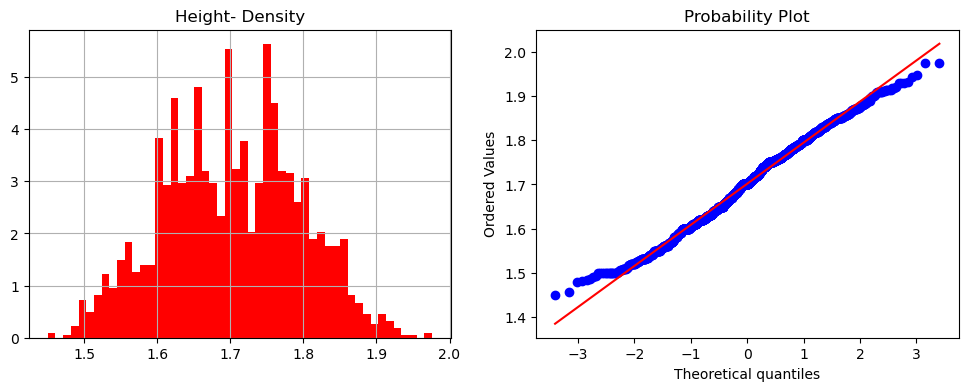

--------------Weight


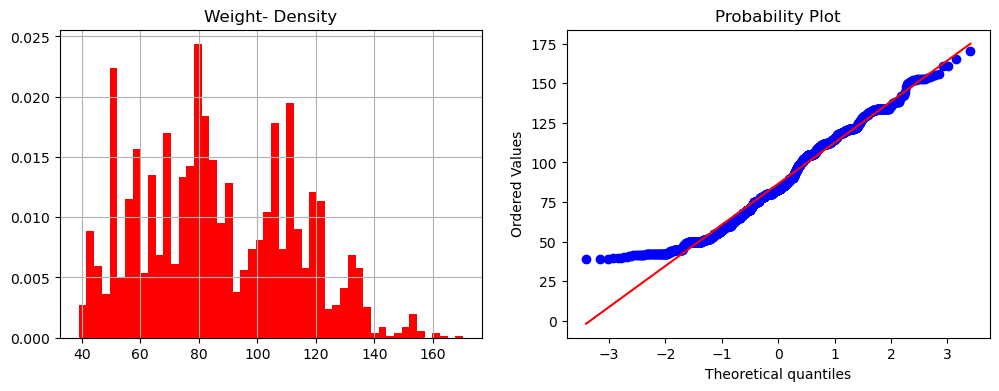

--------------FCVC


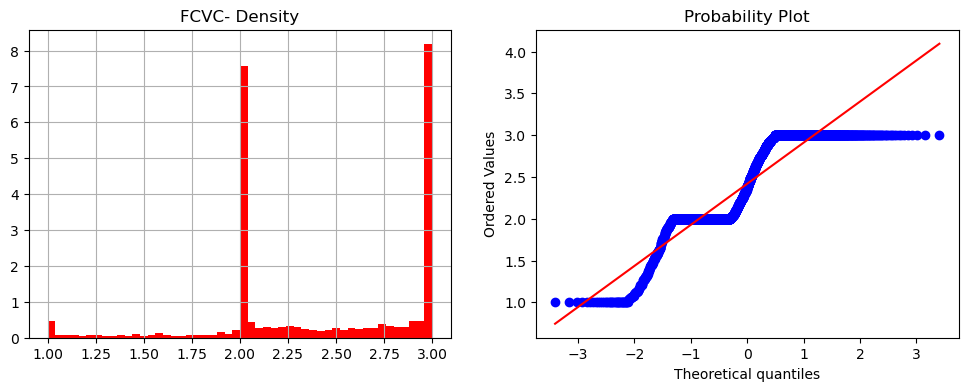

--------------NCP


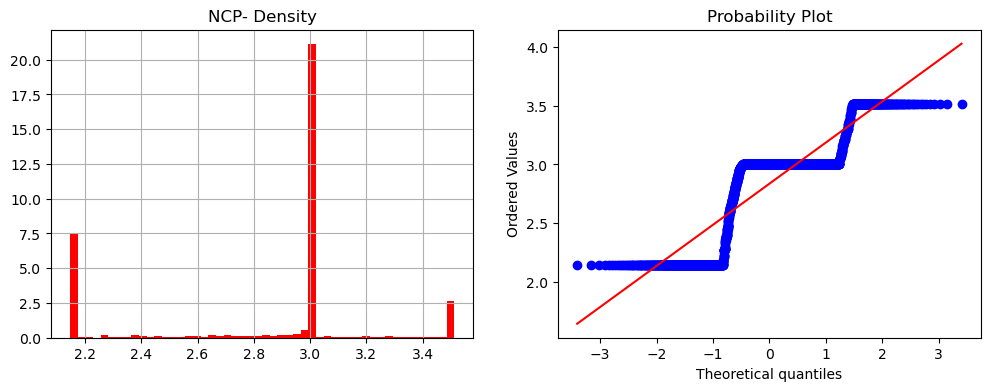

--------------CH2O


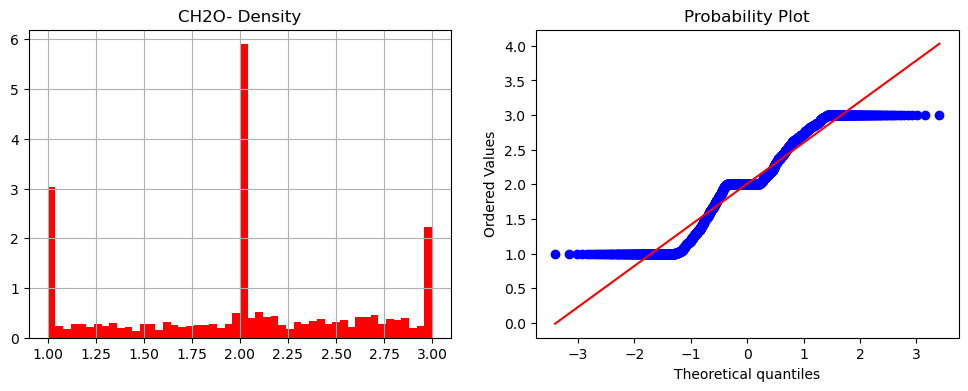

--------------FAF


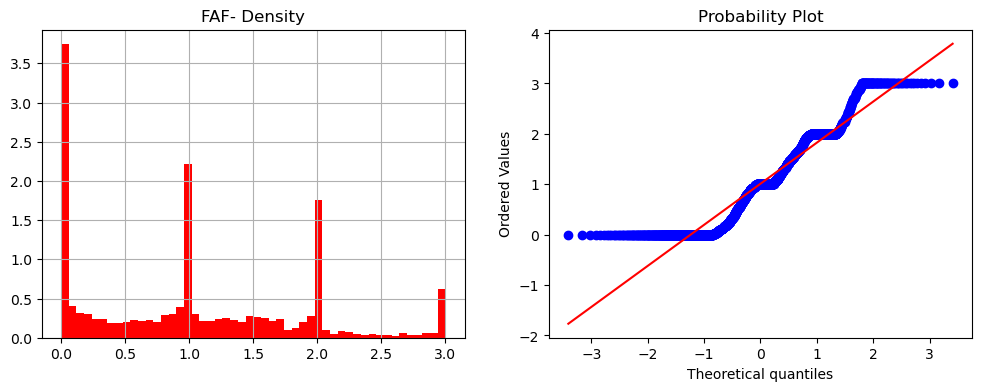

--------------TUE


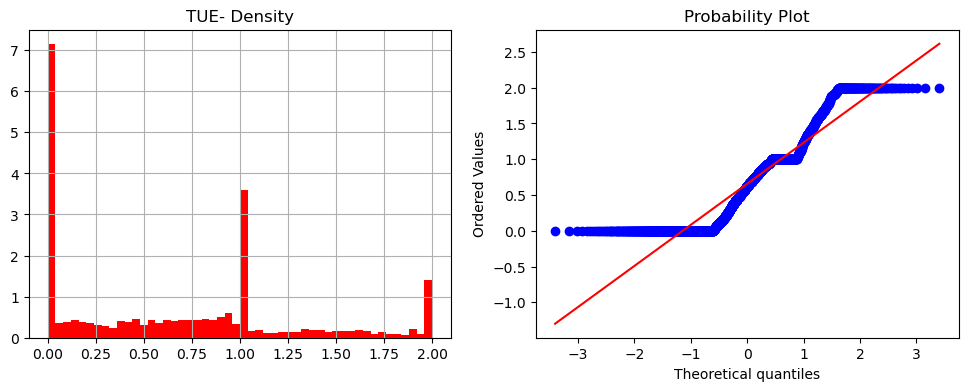

In [19]:
for colName in continuas:

    plt.figure(figsize=(12, 4))
    print("--------------" + colName)

    plt.subplot(121)
    df[colName].hist(bins=50, density=True, color='red')
    plt.title(colName + "- Density")

    plt.subplot(122)
    stats.probplot(df[colName], dist ='norm', plot=plt)

    plt.show()

In [20]:
variables_to_tranform = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

## 4. - Construcción de Modelos

In [21]:
#Features Store
df.to_csv("Obesity_v1.csv", index=False)

In [22]:
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metricas

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#gestion de train-test
from sklearn.model_selection import train_test_split

# Transformaciones
from sklearn.preprocessing import MinMaxScaler

In [23]:
df=pd.read_csv("Obesity_v1.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,639,245,2.0,3.000000,2015,2067,2.0,1726,0.0,1.0,1765,1580,0
1,21.0,0,1.52,56.0,1401,245,3.0,3.000000,96,44,3.0,1726,3.0,0.0,1765,1580,0
2,23.0,1,1.80,77.0,70,245,2.0,3.000000,2015,2067,2.0,1726,2.0,1.0,1765,1580,0
3,27.0,1,1.80,87.0,70,245,3.0,3.000000,2015,2067,2.0,385,2.0,0.0,1765,56,1
4,22.0,1,1.78,89.8,1401,245,2.0,2.146845,2015,2067,2.0,385,0.0,0.0,1765,1580,1


In [24]:
## seleccion de target y features
X = df.drop('NObeyesdad', axis=1) #NObeyesdad va a ser nuestra Y. #Features es lo que voy a usar para predecir
y = df['NObeyesdad'] #con esto vamos a predecir. # targe es lo que voy a predecir. 

In [25]:
## split para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2025, shuffle=True)

In [26]:
# creamos y aplicamos escalado de datos
scaler = MinMaxScaler()

scaler.fit(X_train) #calculamos el scaler

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.1 - Naive Bayes

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Definimos los hiperparámetros que queremos probar
hyper_parameters = {
    "priors": [None],  # None para no especificar priors específicos
    "var_smoothing": [1e-9]  # Lista de valores a probar para var_smoothing
}

# Creamos el clasificador Naive Bayes
nb_classifier = GaussianNB()

# Configuramos la búsqueda de hiperparámetros
nb_hyp_opt = GridSearchCV(estimator=nb_classifier, param_grid=hyper_parameters, cv=10, scoring="roc_auc")

# Entrenamiento del modelo
nb_hyp_opt.fit(X_train_scaled, y_train)

# Imprimimos los mejores hiperparámetros
print("Mejores hiperparámetros: ", nb_hyp_opt.best_params_)

# Predecimos con el mejor modelo
best_nb_classifier = nb_hyp_opt.best_estimator_
nb_predicts = best_nb_classifier.predict(X_test_scaled)

# Calculamos el AUC-ROC con los mejores hiperparámetros
acc = roc_auc_score(y_test, nb_predicts)
print("Roc_Auc Score:", acc)


Mejores hiperparámetros:  {'priors': None, 'var_smoothing': 1e-09}
Roc_Auc Score: 0.6046129853073956


In [28]:
nb_hyp_opt.best_score_

0.7081152149808023

In [29]:
nb_hyp_opt.best_params_

{'priors': None, 'var_smoothing': 1e-09}

#### 4.1.1 - Resultados de Optimizacion de Hyper_parametros

In [177]:
resultados_nb = pd.DataFrame(nb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_nb.to_excel('resultados_nb_grid_search.xlsx', index=False)

#### 4.1.2 Registro del modelo

In [31]:
# Inicialización del clasificador Naive Bayes
nv_v1 = GaussianNB(priors=None, var_smoothing=1e-09)

# Entrenamiento del modelo Naive Bayes
nv_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
nv_v1_predicts = nv_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, nv_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.6046129853073956


#### 4.1.3 - Modelo Final Definitivo 

In [100]:
modelo_final_nv = GaussianNB(priors= None, var_smoothing=1e-09)
X_scaled = scaler.transform(X)
modelo_final_nv.fit(X_scaled,y)

GaussianNB()

### 4.2 - LDA - LinearDiscriminantAnalysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto'],
    'priors': [None, [0.1, 0.9], [0.2, 0.8]],
    'n_components': [None, min(X_train.shape[1], len(np.unique(y_train))) - 1],
    'store_covariance': [False, True]
}

# Crear el clasificador LDA
lda_classifier = LinearDiscriminantAnalysis()

# Configurar la búsqueda de hiperparámetros
lda_grid_search = GridSearchCV(estimator=lda_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Escalar los datos si es necesario (solo si se necesita estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo
lda_grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", lda_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_lda_classifier = lda_grid_search.best_estimator_
lda_predicts = best_lda_classifier.predict(X_test_scaled)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, lda_predicts)
print("Accuracy Score:", acc)


Mejores hiperparámetros: {'n_components': None, 'priors': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': False}
Accuracy Score: 0.6750788643533123


#### 4.2.1 - Resultados de Optimizacion de Hyper_parametros

In [178]:
resultados_lda = pd.DataFrame(lda_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_lda.to_excel('resultados_lda_grid_search.xlsx', index=False)

In [161]:
pd.DataFrame(lda_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]

,rank_test_score,params,mean_test_score,std_test_score
0,1,"{'store_covariance': False, 'tol': 0.0001}",0.681791,0.017603
1,1,"{'store_covariance': False, 'tol': 0.001}",0.681791,0.017603
2,1,"{'store_covariance': False, 'tol': 0.01}",0.681791,0.017603
3,1,"{'store_covariance': True, 'tol': 0.0001}",0.681791,0.017603
4,1,"{'store_covariance': True, 'tol': 0.001}",0.681791,0.017603
5,1,"{'store_covariance': True, 'tol': 0.01}",0.681791,0.017603


#### 4.2.2 Registro del modelo

In [84]:
# Inicialización del clasificador LDA con los hiperparámetros correctos
LDA_v1 = LinearDiscriminantAnalysis(store_covariance= False, tol=0.0001)

# Entrenamiento del modelo LDA
LDA_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
LDA_v1_predicts = LDA_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, LDA_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.6550521218090782


In [65]:
lda_grid_search.best_score_

0.6817911131470453

In [66]:
lda_grid_search.best_params_

{'store_covariance': False, 'tol': 0.0001}

#### 4.2.3 - Modelo Final Definitivo 

In [95]:
modelo_final_ld = LinearDiscriminantAnalysis(store_covariance= False, tol= 0.0001)
X_scaled = scaler.transform(X)
modelo_final_ld.fit(X_scaled,y)

LinearDiscriminantAnalysis()

### 4.3 - Regresión logística

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Valores de regularización
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Métodos de optimización
    'max_iter': [100, 200, 300],  # Número máximo de iteraciones
    'class_weight': [None, 'balanced'],  # Opciones de peso de clase
    'fit_intercept': [True, False]  # Si se debe ajustar la intercepción
}

# Crear el clasificador de Regresión Logística
logit = LogisticRegression()

# Configurar la búsqueda de hiperparámetros con validación cruzada
logit_grid_search = GridSearchCV(estimator=logit, param_grid=param_grid, cv=5, scoring='roc_auc', error_score='raise')

# Escalar los datos si es necesario (solo si se necesita estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo
logit_grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", logit_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_logit_classifier = logit_grid_search.best_estimator_
logit_predicts = best_logit_classifier.predict(X_test_scaled)

# Calcular el área bajo la curva ROC (ROC AUC) con los mejores hiperparámetros
acc = roc_auc_score(y_test, logit_predicts)
print("Roc_Auc Score:", acc)


Mejores hiperparámetros: {'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'solver': 'saga'}
Roc_Auc Score: 0.6367684478371503


#### 4.3.1 - Resultados de Optimizacion de Hyper_parametros

In [179]:
resultados_logit = pd.DataFrame(logit_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_logit.to_excel('resultados_logit_grid_search.xlsx', index=False)

#### 4.3.2 - Registro del modelo

In [82]:
# Inicialización del clasificador lr con los hiperparámetros correctos
logit_v1 = LogisticRegression(C=0.01, class_weight= 'balanced', fit_intercept= True, max_iter= 100, solver= 'saga')

# Entrenamiento del modelo lr
logit_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
logit_v1_predicts = logit_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, logit_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.6367684478371503


In [70]:
logit_grid_search.best_score_


0.7107569018938866

In [167]:
logit_grid_search.best_params_

{'C': 0.01,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'max_iter': 100,
 'solver': 'saga'}

#### 4.3.3 - Modelo Final Definitivo

In [92]:
modelo_final_lr = LogisticRegression(C=0.01, class_weight= 'balanced', fit_intercept= True, max_iter=100, solver='saga')

X_scaled = scaler.transform(X)
modelo_final_lr.fit(X_scaled,y)

LogisticRegression(C=0.01, class_weight='balanced', solver='saga')

#### 4.4 - SVM

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.1, 1.0, 10.0],                # Regularización
    'kernel': ['linear', 'rbf', 'poly'],  # Tipo de kernel
    'degree': [2, 3, 4],                  # Grado del kernel polinomial
    'gamma': ['scale', 'auto'],           # Parámetro gamma para kernel rbf
    'coef0': [0.0, 0.1, 0.5]              # Parámetro coef0 para kernel polinomial
}

# Crear el clasificador SVM
svm_classifier = SVC(probability=True)

# Configurar la búsqueda de hiperparámetros usando GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Escalar los datos si es necesario (solo si se necesita estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVM con búsqueda de hiperparámetros
svm_grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", svm_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_svm_classifier = svm_grid_search.best_estimator_
svm_predicts = best_svm_classifier.predict(X_test_scaled)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, svm_predicts)
print("Accuracy Score:", acc)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros: {'C': 10.0, 'coef0': 0.5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy Score: 0.889589905362776


In [40]:
#svm 1
svm_classifier1 = SVC(kernel='poly', C=0.5, random_state=42, gamma="scale", degree=5, coef0=0.3, shrinking=True)
svm_classifier1.fit(X_train_scaled,y_train)

svm_predicts1 = svm_classifier1.predict(X_test_scaled)

acc = roc_auc_score(svm_predicts1,y_test)
print("NB - Roc Auc Score: ",acc)

NB - Roc Auc Score:  0.8725869129199398


In [41]:
#svm 1
svm_classifier2 = SVC(kernel='poly', C=0.8, random_state=45, gamma="scale", degree=8, coef0=0.3, shrinking=True)
svm_classifier2.fit(X_train_scaled,y_train)

svm_predicts2 = svm_classifier2.predict(X_test_scaled)

acc = roc_auc_score(svm_predicts2,y_test)
print("NB - Roc Auc Score: ",acc)

NB - Roc Auc Score:  0.8696457821457821


#### 4.4.1 - Resultados de Optimizacion de Hyper_parametros

In [180]:
resultados_svm = pd.DataFrame(svm_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_svm.to_excel('resultados_svm_grid_search.xlsx', index=False)

#### 4.4.2 - Registro del modelo

In [88]:
# Inicialización del clasificador svc con los hiperparámetros correctos
svm_v1 = SVC(C= 10.0, coef0= 0.5, degree= 3, gamma='auto', kernel= 'poly')
# Entrenamiento del modelo svc
svm_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
svm_v1_predicts = svm_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, svm_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.8872917179676598


In [102]:
svm_grid_search.best_params_


{'C': 10.0, 'coef0': 0.5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [101]:
svm_grid_search.best_score_

0.9262070545121392

#### 4.4.3 - Modelo Final Definitivo

In [91]:
modelo_final_svc = SVC(C=10.0, coef0= 0.5, degree= 3, gamma= 'auto', kernel= 'poly')
X_scaled = scaler.transform(X)
modelo_final_svc.fit(X_scaled,y)

SVC(C=10.0, coef0=0.5, gamma='auto', kernel='poly')

#### 4.5 - Árboles de decisión

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],                # Medida de calidad de la separación
    'splitter': ['best', 'random'],                  # Estrategia para escoger la separación de cada nodo
    'max_depth': [None, 10, 20, 30],                 # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],                  # Mínimo número de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],                   # Mínimo número de muestras requeridas para estar en un nodo hoja
    }

# Crear el clasificador de Árbol de Decisión
dt_classifier = DecisionTreeClassifier()

# Configurar la búsqueda de hiperparámetros
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Escalar los datos si es necesario (solo si se necesita estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo
dt_grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", dt_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_dt_classifier = dt_grid_search.best_estimator_
dt_predicts = best_dt_classifier.predict(X_test_scaled)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, dt_predicts)
print("Accuracy Score:", acc)


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy Score: 0.9605678233438486


#### 4.5.1 - Resultados de Optimizacion de Hyper_parametros

In [181]:
resultados_dt = pd.DataFrame(dt_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_dt.to_excel('resultados_dt_grid_search.xlsx', index=False)

#### 4.5.2 - Registro del modelo

In [104]:
dt_grid_search.best_score_

0.9688547869903802

In [105]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [106]:
# Inicialización del clasificador dt con los hiperparámetros correctos
dt_v1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
# Entrenamiento del modelo dt
dt_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
dt_v1_predicts = dt_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, dt_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.9525568415004515


#### 4.5.3 - Modelo Final Definitivo

In [108]:
modelo_final_dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
X_scaled = scaler.transform(X)
modelo_final_dt.fit(X_scaled,y)

DecisionTreeClassifier(max_depth=30)

#### 4.6 - Random forest

In [43]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

rf_predicts = rf_classifier.predict(X_test_scaled)

acc = roc_auc_score(rf_predicts, y_test)
print("Roc_Auc Socre:", acc)

Roc_Auc Socre: 0.9618800120340689


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
hyper_parameters = {
    "n_estimators": [10, 50, 100, 500, 1000],
    "criterion": ['gini', 'entropy'],
    "max_depth": [10, 20]
}

rf_classifier = RandomForestClassifier()

#configuracion de optimizacion de hyper-parametros
rf_hyp_opt = GridSearchCV(estimator=rf_classifier, param_grid=hyper_parameters, cv=10, scoring="roc_auc")

#entrenamiento de modelo
rf_hyp_opt.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='roc_auc')

In [46]:
# score del mejor modelo
rf_hyp_opt.best_score_

0.9967467569453639

In [47]:
rf_hyp_opt.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=1000)

In [48]:
#mejores hyper-parametros
rf_hyp_opt.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 1000}

#### 4.6.1 - Resultados de Optimizacion de Hyper_parametros

In [182]:
resultados_rf = pd.DataFrame(rf_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_rf.to_excel('resultados_rf_grid_search.xlsx', index=False)

#### 4.6.2 - Registro del Modelo.

In [50]:
#este resultado nos sirve para comparar con otros modelos
rf_v1 = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)

rf_v1.fit(X_train_scaled, y_train)

rf_v1_predicts = rf_v1.predict(X_test_scaled)

roc_auc = roc_auc_score(rf_v1_predicts, y_test)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.9593047288359788


#### 4.6.3 - Modelo Final Definitivo 

In [109]:
modelo_final_rf = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)

X_scaled = scaler.transform(X)
modelo_final_rf.fit(X_scaled,y)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)

### 4.7 - Análisis de discriminante lineal

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'store_covariance': [False, True],            # Si se almacena la matriz de covarianza de las clases después del ajuste
    'tol': [1.0e-4, 1.0e-3, 1.0e-2],               # Tolerancia para los valores propios de la matriz de covarianza
}

# Crear el clasificador de LDA
lda_classifier = LinearDiscriminantAnalysis()

# Configurar la búsqueda de hiperparámetros
lda_grid_search = GridSearchCV(estimator=lda_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Escalar los datos si es necesario (solo si se necesita estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo
lda_grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", lda_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_lda_classifier = lda_grid_search.best_estimator_
lda_predicts = best_lda_classifier.predict(X_test_scaled)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, lda_predicts)
print("Accuracy Score:", acc)


Mejores hiperparámetros: {'store_covariance': False, 'tol': 0.0001}
Accuracy Score: 0.6766561514195584


#### 4.7.1 - Resultados de Optimizacion de Hyper_parametros

In [183]:
resultados_ldaa = pd.DataFrame(lda_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_ldaa.to_excel('resultados_ldaa_grid_search.xlsx', index=False)

#### 4.7.2 - Registro del modelo


In [111]:
lda_grid_search.best_score_

0.6817911131470453

In [112]:
lda_grid_search.best_params_

{'store_covariance': False, 'tol': 0.0001}

In [119]:
# Inicialización del clasificador lda con los hiperparámetros correctos
ldaa_v1 = LinearDiscriminantAnalysis (store_covariance= False, tol= 0.0001)
# Entrenamiento del modelo lda
ldaa_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
ldaa_v1_predicts = ldaa_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, ldaa_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.6550521218090782


#### 4.7.3 - Modelo Final Definitivo

In [120]:
modelo_final_ldaa = LinearDiscriminantAnalysis (store_covariance= False, tol= 0.0001)

X_scaled = scaler.transform(X)
modelo_final_ldaa.fit(X_scaled,y)

LinearDiscriminantAnalysis()

### 4.8 - Análisis de discriminante cuadrático

In [53]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8]],  # Probabilidad a priori de cada clase
    'reg_param': [0.0, 0.1, 0.2],  # Parámetro de regularización para las estimaciones de covarianza
    'store_covariance': [False, True],  # Si se almacena la matriz de covarianza de las clases después del ajuste
    'tol': [1.0e-4, 1.0e-3, 1.0e-2],  # Tolerancia para los valores singulares significativos
}

# Crear el clasificador de QDA
qda_classifier = QuadraticDiscriminantAnalysis()

# Configurar la búsqueda de hiperparámetros
qda_grid_search = GridSearchCV(estimator=qda_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Escalar los datos si es necesario (solo si se necesita estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo
qda_grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", qda_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_qda_classifier = qda_grid_search.best_estimator_
qda_predicts = best_qda_classifier.predict(X_test_scaled)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, qda_predicts)
print("Accuracy Score:", acc)


Mejores hiperparámetros: {'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}
Accuracy Score: 0.7728706624605678


#### 4.8.1 - Resultados de Optimizacion de Hyper_parametros

In [184]:
resultados_qda = pd.DataFrame(qda_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_qda.to_excel('resultados_qda_grid_search.xlsx', index=False)

#### 4.8.2 - Registro del modelo

In [116]:
qda_grid_search.best_score_

0.7948327989005955

In [117]:
qda_grid_search.best_params_

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

In [118]:
# Inicialización del clasificador qda con los hiperparámetros correctos
qda_v1 = QuadraticDiscriminantAnalysis(priors= None, reg_param= 0.0, store_covariance= False, tol= 0.0001)
# Entrenamiento del modelo qda
qda_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
qda_v1_predicts = qda_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, qda_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.7720286464745958


#### 4.8.3 - Modelo Final Definitivo

In [121]:
modelo_final_qda = QuadraticDiscriminantAnalysis(priors= None, reg_param= 0.0, store_covariance= False, tol= 0.0001)

X_scaled = scaler.transform(X)
modelo_final_qda.fit(X_scaled,y)

QuadraticDiscriminantAnalysis()

### 4.9 - AdaBoost

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [None, 42, 100]
}

# Crear el clasificador AdaBoost
adaboost_classifier = AdaBoostClassifier()

# Configurar la búsqueda de hiperparámetros
adaboost_grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Entrenar el modelo
adaboost_grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", adaboost_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_adaboost_classifier = adaboost_grid_search.best_estimator_
adaboost_predicts = best_adaboost_classifier.predict(X_test)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, adaboost_predicts)
print("Accuracy Score:", acc)


C:\Users\Carlos Carrera\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Carlos Carrera\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Carlos Carrera\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Carlos Carrera\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecat

Mejores hiperparámetros: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'random_state': None}
Accuracy Score: 0.807570977917981


#### 4.9.1 - Resultados de Optimizacion de Hyper_parametros

In [185]:
resultados_adaboost = pd.DataFrame(adaboost_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_adaboost.to_excel('resultados_adaboost_grid_search.xlsx', index=False)

#### 4.9.2 - Registro del modelo

In [123]:
adaboost_grid_search.best_score_

0.8395281722400366

In [125]:
adaboost_grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'random_state': None}

In [126]:
# Inicialización del clasificador adaboost con los hiperparámetros correctos
ada_v1 = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1.0, random_state= None)
# Entrenamiento del modelo adaboost
ada_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
ada_v1_predicts = ada_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, ada_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

C:\Users\Carlos Carrera\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Roc_Auc_Score: 0.8072416481983091


#### 4.9.3 - Modelo Final Definitivo

In [127]:
modelo_final_ada = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1.0, random_state= None)
X_scaled = scaler.transform(X)
modelo_final_ada.fit(X_scaled,y)

C:\Users\Carlos Carrera\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

### 4.10 - Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Crear el clasificador Gradient Boosting
gb_classifier = GradientBoostingClassifier()

# Configurar la búsqueda de hiperparámetros
gb_grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Entrenar el modelo
gb_grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", gb_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_gb_classifier = gb_grid_search.best_estimator_
gb_predicts = best_gb_classifier.predict(X_test)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, gb_predicts)
print("Accuracy Score:", acc)


Mejores hiperparámetros: {'learning_rate': 1.0, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score: 0.9794952681388013


#### 4.10.1 - Resultados de Optimizacion de Hyper_parametros

In [186]:
resultados_gb = pd.DataFrame(gb_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_gb.to_excel('resultados_gb_grid_search.xlsx', index=False)

#### 4.10.2 - Registro del modelo

In [129]:
gb_grid_search.best_score_

0.9844251030691709

In [130]:
gb_grid_search.best_params_

{'learning_rate': 1.0,
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [131]:
# Inicialización del clasificador gb con los hiperparámetros correctos
gb_v1 = GradientBoostingClassifier(learning_rate= 1.0, max_depth= 7, max_features= None, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 200)
# Entrenamiento del modelo gb
gb_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
gb_v1_predicts = gb_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, gb_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.9728515144053189


#### 4.10.3 - Modelo Final Definitivo

In [132]:
modelo_final_gb = GradientBoostingClassifier(learning_rate= 1.0, max_depth= 7, max_features= None, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 200)
X_scaled = scaler.transform(X)
modelo_final_gb.fit(X_scaled,y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=7, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

### 4.11 - XGBoost

In [62]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.1/124.9 MB 328.2 kB/s eta 0:06:21
   ---------------------------------------- 0.1/124.9 MB 554.9 kB/s eta 0:03:45
   ---------------------------------------- 0.3/124.9 MB 983.0 kB/s eta 0:02:07
   ---------------------------------------- 0.4/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.7/124.9 MB 1.8 MB/s eta 0:01:09
   -------------------------

In [135]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0]
}

# Crear el clasificador XGBoost
xgb_classifier = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Configurar la búsqueda de hiperparámetros
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Entrenar el modelo
xgb_grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", xgb_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_xgb_classifier = xgb_grid_search.best_estimator_
xgb_predicts = best_xgb_classifier.predict(X_test)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, xgb_predicts)
print("Accuracy Score:", acc)


Mejores hiperparámetros: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.8}
Accuracy Score: 0.9747634069400631


#### 4.11.1 - Resultados de Optimizacion de Hyper_parametros

In [187]:
resultados_xgb = pd.DataFrame(xgb_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_xgb.to_excel('resultados_svm_grid_search.xlsx', index=False)

#### 4.11.2 - Registro del modelo

In [138]:
xgb_grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.8}

In [139]:
xgb_grid_search.best_score_

0.9769743472285846

In [140]:
# Inicialización del clasificador xgb con los hiperparámetros correctos
xgb_v1 = XGBClassifier(learning_rate = 0.1, n_estimators = 200, subsample= 0.8)
# Entrenamiento del modelo xgb
xgb_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
xgb_v1_predicts = xgb_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, xgb_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

Roc_Auc_Score: 0.9751087581055569


#### 4.11.3 - Modelo Final Definitivo

In [137]:
modelo_final_xgb =XGBClassifier(learning_rate = 0.1, n_estimators = 200, subsample= 0.8)
X_scaled = scaler.transform(X)
modelo_final_xgb.fit(X_scaled,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 4.12 - LGBM

In [59]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/ca/b4/57f3f253721e0a16ea28c49acca92c5b1198eb94fbbb8328d6dabc61d2e0/lightgbm-4.4.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 465.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 581.0 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 762.6 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 901.1 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.4 MB/s eta 0:00:01
   ------------- -------------------------- 0

In [60]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import logging

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'num_leaves': [20, 31, 40],
}

# Crear el clasificador LightGBM
lgb_classifier = lgb.LGBMClassifier(verbose=-1)  # Ajuste del nivel de verbosidad

# Configurar la búsqueda de hiperparámetros
lgb_grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Ajustar el nivel de registro de LightGBM a 'error' para reducir los mensajes informativos
logging.basicConfig(level=logging.ERROR)

# Entrenar el modelo
lgb_grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", lgb_grid_search.best_params_)

# Predecir con el mejor modelo encontrado
best_lgb_classifier = lgb_grid_search.best_estimator_
lgb_predicts = best_lgb_classifier.predict(X_test)

# Calcular la exactitud (accuracy) con los mejores hiperparámetros
acc = accuracy_score(y_test, lgb_predicts)
print("Accuracy Score:", acc)


Mejores hiperparámetros: {'learning_rate': 0.2, 'n_estimators': 100, 'num_leaves': 31}
Accuracy Score: 0.9810725552050473


#### 4.12.1 - Resultados de Optimizacion de Hyper_parametros

In [188]:
resultados_lgb = pd.DataFrame(lgb_grid_search.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
resultados_lgb.to_excel('resultados_lgb_grid_search.xlsx', index=False)

#### 4.12.2 - Registro del modelo

In [144]:
lgb_grid_search.best_params_

{'learning_rate': 0.2, 'n_estimators': 100, 'num_leaves': 31}

In [145]:
lgb_grid_search.best_score_

0.9864544205222172

In [147]:
# Inicialización del clasificador lgb con los hiperparámetros correctos
lgb_v1 = lgb.LGBMClassifier(learning_rate = 0.2, n_estimators = 200, subsample= 0.8)
# Entrenamiento del modelo lgb
lgb_v1.fit(X_train_scaled, y_train)

# Predicción con datos de prueba
lgb_v1_predicts = lgb_v1.predict(X_test_scaled)

# Evaluación del modelo usando ROC AUC score
roc_auc = roc_auc_score(y_test, lgb_v1_predicts)
print("Roc_Auc_Score:", roc_auc)

[LightGBM] [Info] Number of positive: 642, number of negative: 835
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 1477, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434665 -> initscore=-0.262843
[LightGBM] [Info] Start training from score -0.262843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

#### 4.12.3 - Modelo Final Definitivo

In [149]:
modelo_final_lgb =lgb.LGBMClassifier(learning_rate = 0.1, n_estimators = 200, subsample= 0.8)
X_scaled = scaler.transform(X)
modelo_final_lgb.fit(X_scaled,y)



[LightGBM] [Info] Number of positive: 904, number of negative: 1207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 2111, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.428233 -> initscore=-0.289064
[LightGBM] [Info] Start training from score -0.289064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMClassifier(n_estimators=200, subsample=0.8)